# Exercise - Simple Linear Regression



In this notebook you can check your understanding of linear regression and implement a linear regression model with scikit-learn by yourself. 




## Learning Objectives



At the end of this notebook you should be able to 
- describe the relationship between two variables.
- train a linear regression model with scikit-learn.
- interpret the $R^2$ of a linear regression model.

## Question 1 



The scatter plots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lin_reg_ex_1.png" width="600">  

**(a) Describe the relationship between volume and height of these trees.**

In [3]:
#the higher the tree is, the bigger the volume is, a positive correlation

**(b) Describe the relationship between volume and diameter of these trees.**

In [4]:
#the larger the the diameter is, the bigger the volume is, a string positive correlation

**(c) Suppose you measured the height and diameter of another black cherry tree. Which of these variables would be better for predicting the wood volume of this tree using a simple linear regression model? Explain your reasoning.**

In [5]:
# the diameter would be better for predicting the wood volume using a simple tree linear regression 
# because the perasons r seams to be higher here, meaning the (positive) correlation is stronger

## Question 2 

The file `utils.csv` in your data folder contains information about the average utility bills for homes of a particular size and the average monthly temperature.  

**(a) Load the data:**

In [10]:
#Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)
utils = pd.read_csv("data/utils.csv")
utils.head(n=5)

utils

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69
5,Jun,94.5,78
6,Jul,120.0,84
7,Aug,142.5,89
8,Sep,97.5,79
9,Oct,84.0,64


**(b) Make a scatter plot of the data average bill vs average monthly temperature. Which variable would make the most sense as the response variable?**

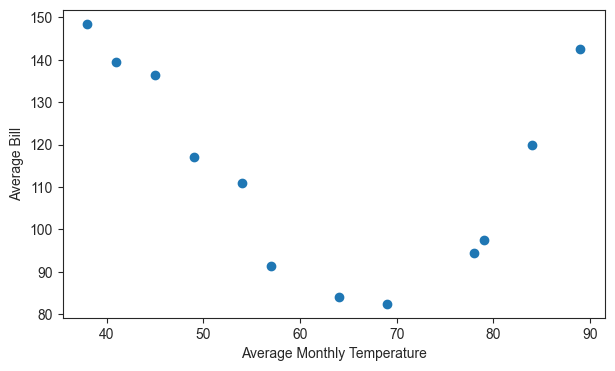

In [ ]:
plt.scatter(utils['Average Monthly Temperature'], utils['Average Bill'])
plt.xlabel("Average Monthly Temperature")
plt.ylabel("Average Bill");

# the Average Monthly Temperature variable is the independent / explanatory variable (feature) since 
# it is the one that is not affected by the other.
# the Average Bill is the target / repsonse variable or the dependent variable, 
# because it is affected by the temperature. not the other way around

**(c) Have a look at the plot above. How would you describe the relationship between the variables?** 

In [ ]:
# the is a correlation but not a linear one. extreme temperatures (very high and very low) increase the average bill

**(d) Train a simple linear regression model using scikit-learn**

In [16]:
# Import linear regression from sklearn library
from sklearn.linear_model import LinearRegression

In [12]:
# Prepare data for modeling by defining target and feature
X = utils[['Average Monthly Temperature']]  # X needs to be 2-dimensional so we need double brackets here
y = utils['Average Bill']

In [13]:
# Show dimensions of X
X.shape

(12, 1)

In [17]:
# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature Average Monthly Temperature:", slope)

Model intercept: 143.62280506779285
Coefficient for feature Average Monthly Temperature: -0.4798844187597245


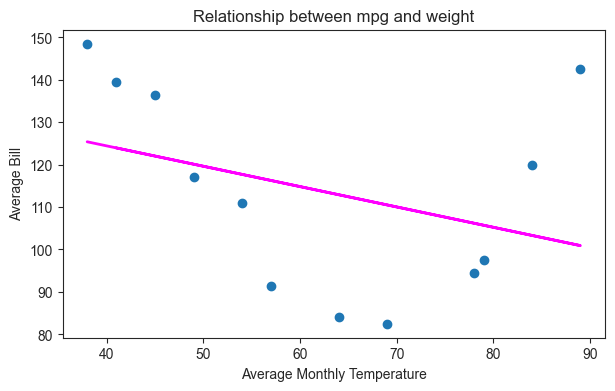

In [19]:
# Plotting our data points
plt.scatter(X, y)

# Adding the fitted regression line of our model
plt.plot(X, X*slope +intercept, '-', color='magenta', linewidth=2)

plt.title("Relationship between mpg and weight")
plt.ylabel("Average Bill");
plt.xlabel("Average Monthly Temperature");

**(e) Calculate and interpret the value of $R^2$.**  

In [20]:
# Import r-squared from sklearn
from sklearn.metrics import r2_score

In [22]:
#Calculate the estimated value for each data point
y_hat = lin_reg.predict(X)

# Calculate the R-squared for our model
print("R-squared:", round(r2_score(y, y_hat), 3))

R-squared: 0.124


**(f) Print the intercept and slope/coefficient and interpret them in terms a home owner would understand.**

In [25]:
print("Model intercept:", intercept, ", which means the prediction of the average bill for a 0 farneheit temp")
print("Coefficient for feature Average Monthly Temperature:", slope, ", which means the prediction of the change to the bill with every increase of 1 degree")

Model intercept: 143.62280506779285 , which means the prediction of the average bill for a 0 farneheit temp
Coefficient for feature Average Monthly Temperature: -0.4798844187597245 , which means the prediction of the change to the bill with every increase of 1 degree


**(g) Use your fitted model to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not?** 

In [26]:
# Predict the mpg value for a new car with a weight of 4.5 
new_temp_avg = pd.DataFrame({'Average Monthly Temperature': [120]})
y_hat_new = lin_reg.predict(new_temp_avg)

In [ ]:
print("Predicted value for new observation:", y_hat_new[0].round(3))

## the answer is unresonable because the linear regression fails to see what is quite clear 
# in the scatter plot: with very high and low degrees the bill is increasing
# meaning the bill for 120 degrees will be higher than the one for 90 degrees, which is above 140

Predicted value for new observation: 86.037
